In [1]:
%matplotlib inline 

In [2]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

import numpy as np

import pandas as pd

In [3]:
import clean_text_class as clean
import count_words_letters_class as count

In [26]:
%%bash
ls -l books

total 732
-rw-rw-r-- 1 eleonore eleonore 167518 Feb  4 15:10 alice.txt
-rw-rw-r-- 1 eleonore eleonore 284806 Feb  4 15:10 peterpan.txt
-rw-rw-r-- 1 eleonore eleonore    290 Feb  4 15:10 sample.txt
-rw-rw-r-- 1 eleonore eleonore   1024 Mar  2 00:03 test2.txt
-rw-rw-r-- 1 eleonore eleonore    560 Feb  4 15:10 test.txt
-rw-rw-r-- 1 eleonore eleonore 232779 Feb  4 15:10 wizardofoz.txt


## Analysis book letters frequencies with pandas
### => Testing my Gutengerg books cleaning and letters frequencies classes

In [19]:
books = ["books/alice.txt", "books/peterpan.txt", "books/wizardofoz.txt"]

# Instantiate objects of the clean_text class:
al, pe, wi = clean.clean_text(books[0]), clean.clean_text(books[1]), clean.clean_text(books[2])

In [24]:
# Retrieve Gutenberg books metadata:
meta_al, meta_pe, meta_wi = al.get_metadata(al.text), pe.get_metadata(pe.text), wi.get_metadata(wi.text)

print(meta_al, '\n', meta_pe, '\n', meta_wi)

No metadata found!
{'author': 'Lewis Carroll', 'language': 'English', 'title': "Alice's Adventures in Wonderland"} 
{'author': 'James M. Barrie', 'language': '', 'title': 'Peter Pan'} 
{'author': 'L. Frank Baum', 'language': 'English', 'title': 'The Wonderful Wizard of Oz'}


In [25]:
# Remove metadata, chapter numbers, punctuation:
rm_al, rm_pe, rm_wi = al.remove_metadata(al.text), pe.remove_metadata(pe.text), wi.remove_metadata(wi.text)
rc_al, rc_pe, rc_wi = al.remove_chapters(rm_al), pe.remove_chapters(rm_pe), wi.remove_chapters(rm_wi)
rp_al, rp_pe, rp_wi = al.remove_punctuation(rc_al), pe.remove_punctuation(rc_pe), wi.remove_punctuation(rc_wi)
l_al, l_pe, l_wi = al.text_letters(rp_al), pe.text_letters(rp_pe), wi.text_letters(rp_wi)

In [27]:
# Instantiate objects of the analyse_letters class:
ali, pet, wiz = count.analyse_letters(l_al), count.analyse_letters(l_pe), count.analyse_letters(l_wi)

In [32]:
# Calculate book letters frequencies:

c_ali, c_pet, c_wiz = ali.letters_count(ali.letters), pet.letters_count(pet.letters), wiz.letters_count(wiz.letters)

#print c_ali, '\n', c_pet, '\n', c_wiz

freqs = {meta_al.get('title'): ali.letters_freq_pd(c_ali),
         meta_pe.get('title'): pet.letters_freq_pd(c_pet),
         meta_wi.get('title'): wiz.letters_freq_pd(c_wiz)}

print(freqs.keys())

["Alice's Adventures in Wonderland", 'The Wonderful Wizard of Oz', 'Peter Pan']


In [36]:
print(ali.alphabet)

analyse_letters = pd.DataFrame(index = ali.alphabet, data = freqs)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [40]:
analyse_letters

,Alice's Adventures in Wonderland,Peter Pan,The Wonderful Wizard of Oz
a,8.0,7.6,8.0
b,1.4,1.6,1.4
c,2.4,2.2,2.4
d,4.5,4.6,5.1
e,12.5,12.8,12.8
f,1.9,1.9,2.1
g,2.4,2.1,2.1
h,6.4,7.1,6.9
i,7.0,6.6,5.9
j,0.2,0.2,0.1


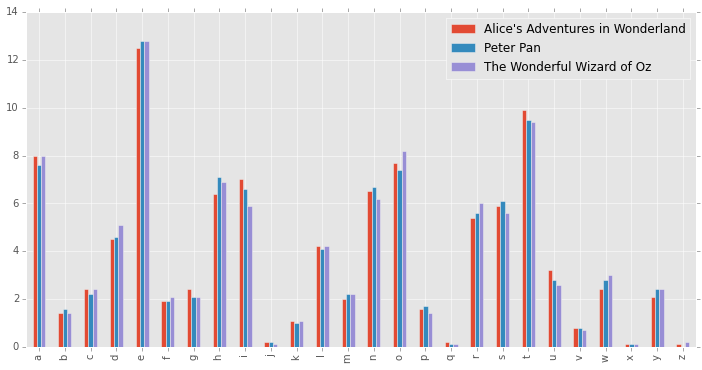

In [44]:
analyse_letters.plot(kind='bar', figsize=(12, 6))

## => (Very) basic stats

In [52]:
means = analyse_letters.mean(1)
stds = analyse_letters.std(1)

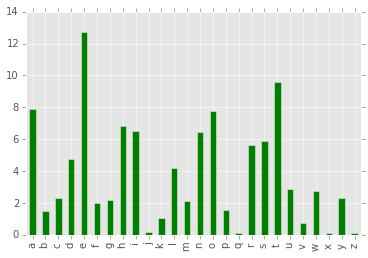

In [54]:
# Plotting the mean of letters frequencies:

means.plot(kind='bar', color='g')

In [63]:
letters_analysis = analyse_letters.transpose()
letters_analysis

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
Alice's Adventures in Wonderland,8.0,1.4,2.4,4.5,12.5,1.9,2.4,6.4,7.0,0.2,...,0.2,5.4,5.9,9.9,3.2,0.8,2.4,0.1,2.1,0.1
Peter Pan,7.6,1.6,2.2,4.6,12.8,1.9,2.1,7.1,6.6,0.2,...,0.1,5.6,6.1,9.5,2.8,0.8,2.8,0.1,2.4,0.0
The Wonderful Wizard of Oz,8.0,1.4,2.4,5.1,12.8,2.1,2.1,6.9,5.9,0.1,...,0.1,6.0,5.6,9.4,2.6,0.7,3.0,0.1,2.4,0.2


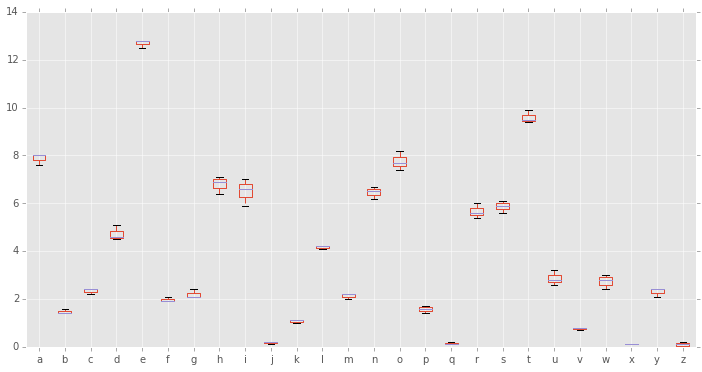

In [67]:
letters_analysis.plot(kind='box', figsize=(12, 6))

###-> Only 3 books tested but the variability seems very low => Is the variability higher between books of different languages?

#### To be continued =)